## MAE290B, Homework Assigment 3
## Cesar B. Rocha (<crocha@ucsd.edu>)
### Winter 2015

In [44]:
from __future__ import division
import numpy as np
from numpy import sqrt,pi,cos,sin
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")
sns.set_context("paper", font_scale=3., rc={"lines.linewidth": 1.5})
sns.set_style("darkgrid",{'grid_color':.95})

## Problem 1: Modified wavenumber

In [64]:
kdx = np.linspace(1.e-14,pi,100)
kprimedx2 =  4*sin(kdx/2)**2

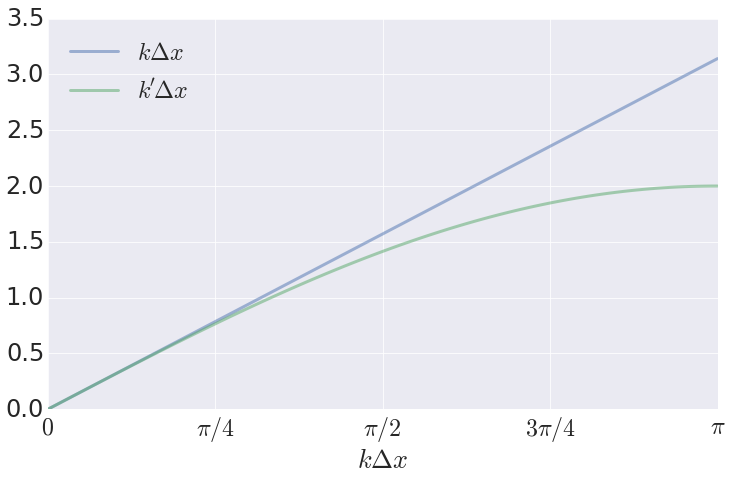

In [65]:
fig = plt.figure(figsize=(12,7))
plt.plot(kdx,kdx,linewidth=3,alpha=.5,label=r"$k\Delta x$")
plt.plot(kdx,sqrt(kprimedx2),linewidth=3,alpha=.5,label=r"$k'\Delta x$")
plt.xticks([0,pi/4,pi/2,3*pi/4,pi],[r'$0$',r'$\pi/4$',r'$\pi/2$',\
                                    r'$3\pi/4$',r'$\pi$'])
plt.xlim(0,pi)
plt.xlabel(r'$k\Delta x$')
plt.legend(loc=2)
plt.savefig('modified_wavenumber_diff')

## Problem 2 Laplace's equation

In [58]:
from numpy import log,ceil

In [67]:
M = 33 # total number of points in each direction
       # note that there are 32 intervals and 31 interior points

### Maximum eigenvalue of the GS matrix and the required number of iterations

In [81]:
lam_max = cos(pi/(M-2))**2
lam_max

0.98976497062624724

In [80]:
N = int(ceil(-2/log(lam_max)))
print "Required number of iterations to reduce the error by 100 is %i" %N

Required number of iterations to reduce the error by 100 is 195


183